In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.shape

(20640, 10)

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

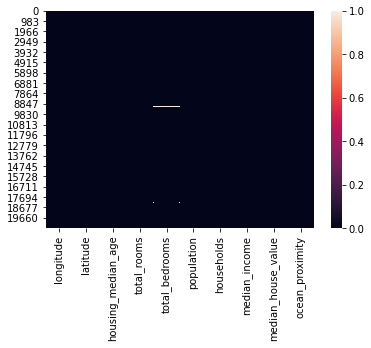

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


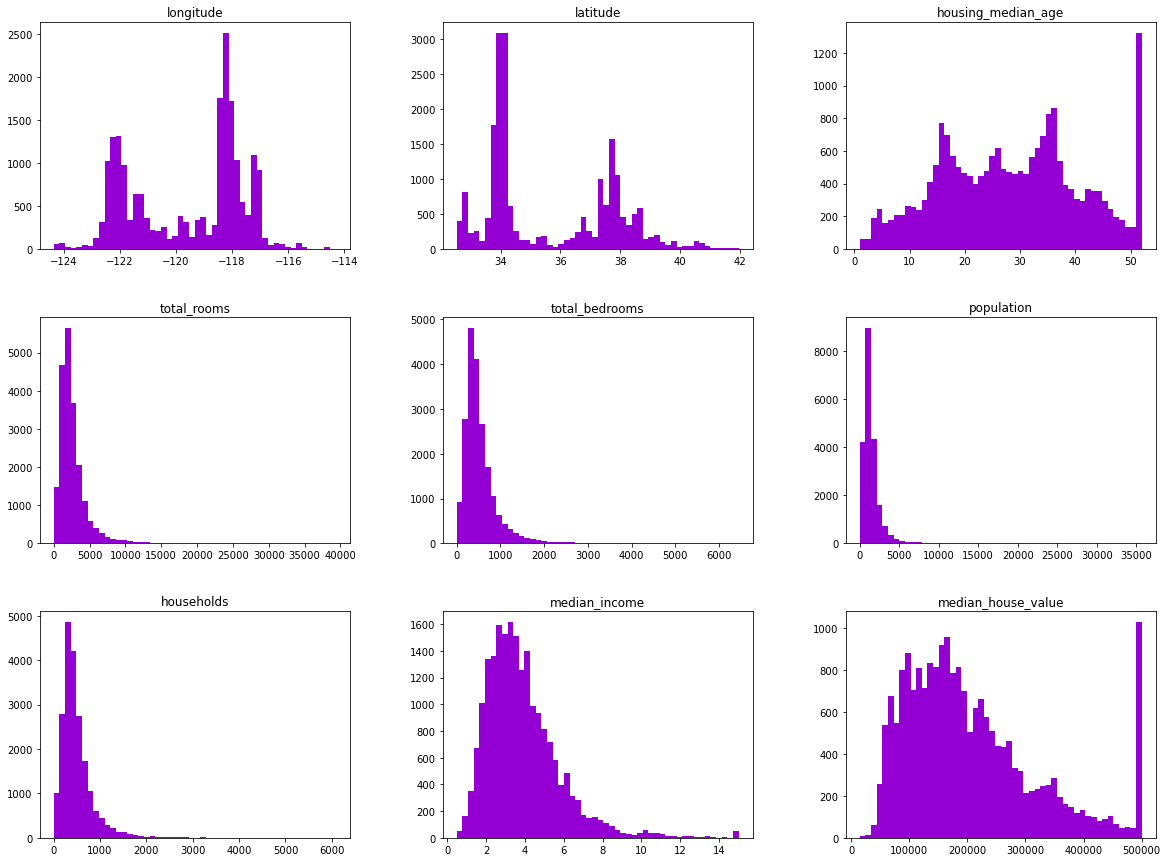

In [9]:
df.hist(bins=50, figsize=(20,15), grid=False, color='darkviolet')
plt.show()

In [10]:
correlation = df.corr()
corr_house_price = correlation['median_house_value'].sort_values(ascending=False)
corr_house_price

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

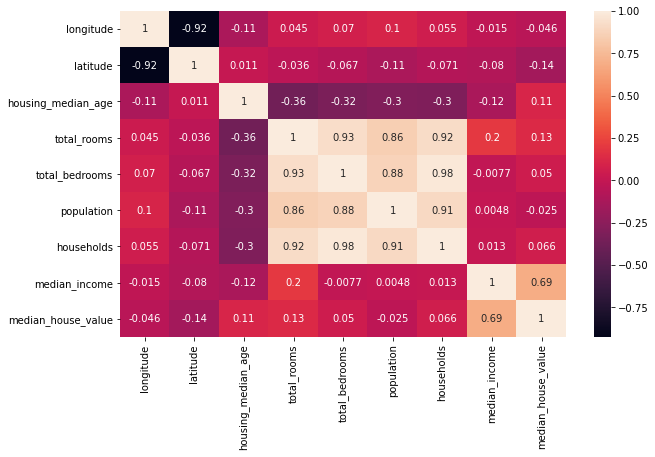

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True)
plt.show()

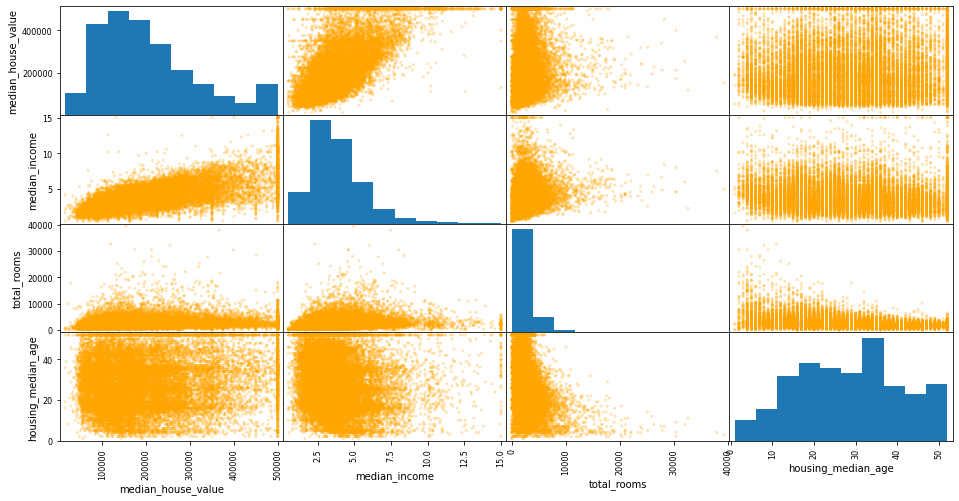

In [12]:
from pandas.plotting import scatter_matrix
columns = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[columns], figsize=(16,8), color='orange', alpha=0.3)
plt.show()

### Handling Categorical Variables

In [13]:
''' Since the model can't take categorical values, we are using dummies and removing categorical column '''

" Since the model can't take categorical values, we are using dummies and removing categorical column "

In [14]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Creating Dummy Variables

In [15]:
dummies = pd.get_dummies(df['ocean_proximity'])
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [16]:
df = df.merge(dummies,left_index=True,right_index=True)

In [17]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0


### Dropping one Dummy Variable

In [18]:
df = df.drop(['ocean_proximity', 'ISLAND'], axis=1)

### Filling Missing Values

In [19]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

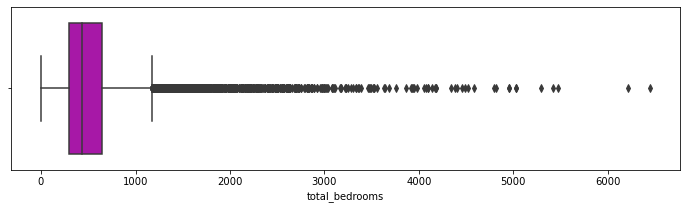

In [20]:
plt.figure(figsize=(12,3))
sns.boxplot(df['total_bedrooms'],color = 'm')
plt.show()

In [21]:
''' Since there are too many outliers, we are filling the null values with median'''

' Since there are too many outliers, we are filling the null values with median'

In [22]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

### Splitting columns based on dependent & independent variables

In [23]:
X = df.drop('median_house_value',axis=1)
Y = df['median_house_value']

In [24]:
X.shape

(20640, 12)

In [25]:
Y.shape

(20640,)

## Split the Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [28]:
x_train.shape

(14448, 12)

In [29]:
x_test.shape

(6192, 12)

In [30]:
y_train.shape

(14448,)

In [31]:
y_test.shape

(6192,)

## Linear-Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred = reg.predict(x_test)

### Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mae

49164.02540420294

In [37]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

66817.99904732281

In [38]:
r2 = r2_score(y_test, y_pred)
r2

0.6629072070044325

#### Accuracy of the Linear Regression Model

In [39]:
reg.score(x_test,y_test)

0.6629072070044325

## Random Forest Model

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
for_pred = forest_reg.predict(x_test)

#### Accuracy of the Random Forest Model

In [45]:
forest_reg.score(x_test,y_test)

0.8331020551841021

### Deploying Random Forest Model

In [46]:
import flask
import pickle

In [47]:
with open('data.pkl','wb') as f:
    pickle.dump(forest_reg, f)

### Loading and testing pickle file where model is saved

In [48]:
load_model = pickle.load(open('data.pkl','rb'))

In [49]:
load_model.predict(x_test)

array([208030.  , 121304.01, 125528.  , ..., 138189.  ,  81196.  ,
       132299.99])